# Análisis predictivo de series temporales
------

## Medidas de dependencia. Covarianza, autocorrelación, correlación cruzada.

------

### Definición (serie temporal):

Una *serie temporal* es una sucesión de variables aleatorias o *proceso estocástico* $x_0,x_1,x_2,\ldots$ definidas en un espacio de probabilidad $(\Omega,\mathcal{A},P)$. La variable aleatoria $x_t$ denota el valor del proceso al tiempo $t$.

* Al proceso estocástico o serie temporal se lo denota por $\{x_t\}$.

* Típicamente (y para todo este curso) se consideran indexados por $t$ entero ($\ldots, -2, -1, 0, 1, 2, \ldots$).

* A los valores particulares que toma una serie temporal cuando la observamos se le denomina *realización* del proceso, y lo denotaremos por $x_t$, abusando un poco de la notación.

### Distribución de un proceso estocástico

Para conocer la distribución de un proceso estocástico, debemos caracterizar cómo se comportan las variables aleatorias $x_t$.

> **Definición:** La función de distribución de una variable aleatoria $X$ es la función $F$ dada por:
>
> $$ F(x) = P(X \leq x)$$

> **Definición:** La función de distribución conjunta de las variables aleatorias $X_1,\ldots,X_n$ es la función $F:\mathbb{R}^n\to\mathbb{R}$ dada por:
>
> $$ F(x_1,\ldots,x_n) = P(X_1 \leq x_1, X_2\leq x_2,\ldots X_n\leq x_n)$$




### Funciones de densidad y densidad conjunta

Para variables continuas es más útil el concepto de *densidad*:

> **Definición:** Una v.a. real $X$ tiene *densidad* $f$ si y solo si para todo intervalo $I$:
>
> $$ P(X \in I) = \int_I f(x)dx$$
>
> En particular $F(x) = \int_{-\infty}^x f(s)ds$ y $f(x) = \frac{\partial}{\partial x} F(x)$.


> **Definición:** Una vector aleatorio $(X_1,\ldots,X_n)$ tiene *densidad conjunta* $f(x_1,\ldots,x_n)$ si y solo si para toda región $R\subset \mathbb{R}^n$:
>
> $$ P(X \in R) = \int\cdots\int_R f(x_1,\ldots,x_n)dx_1\ldots dx_n$$
>
> En particular $F(x_1,\ldots,x_n) = \int_{-\infty}^{x_1} \cdots \int_{-\infty}^{x_n} f(s_1,\ldots,s_n)ds_1\ldots ds_n$ y $f = \frac{\partial ^n}{\partial x_1 \ldots \partial x_n} F$.

### Ejemplo: vectores aleatorios Gaussianos.

Una variable aleatoria real $X$ es *Normal* o *Gaussiana* $X\sim N(\mu,\sigma^2)$ si su densidad es:

$$f(x) = \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$.

$\mu$ es la *media* de la distribución y $\sigma^2$ la *varianza*.


Un vector aleatorio $X=(X_1,\ldots,X_n)$ es Gaussiano de *vector de medias* $\mu$ y *matriz de covarianzas* $\Sigma$ si su densidad conjunta está dada por:

$$ f(x) = \frac{1}{\sqrt{(2\pi)^n \mathrm{det}(\Sigma)} } e^{(x-\mu)^T \Sigma^{-1} (x-\mu)} $$

siendo $x=(x_1,\ldots,x_n)$ interpretado como vector columna, y $\mathrm{det}$ la función determinante.

#### Ejemplo

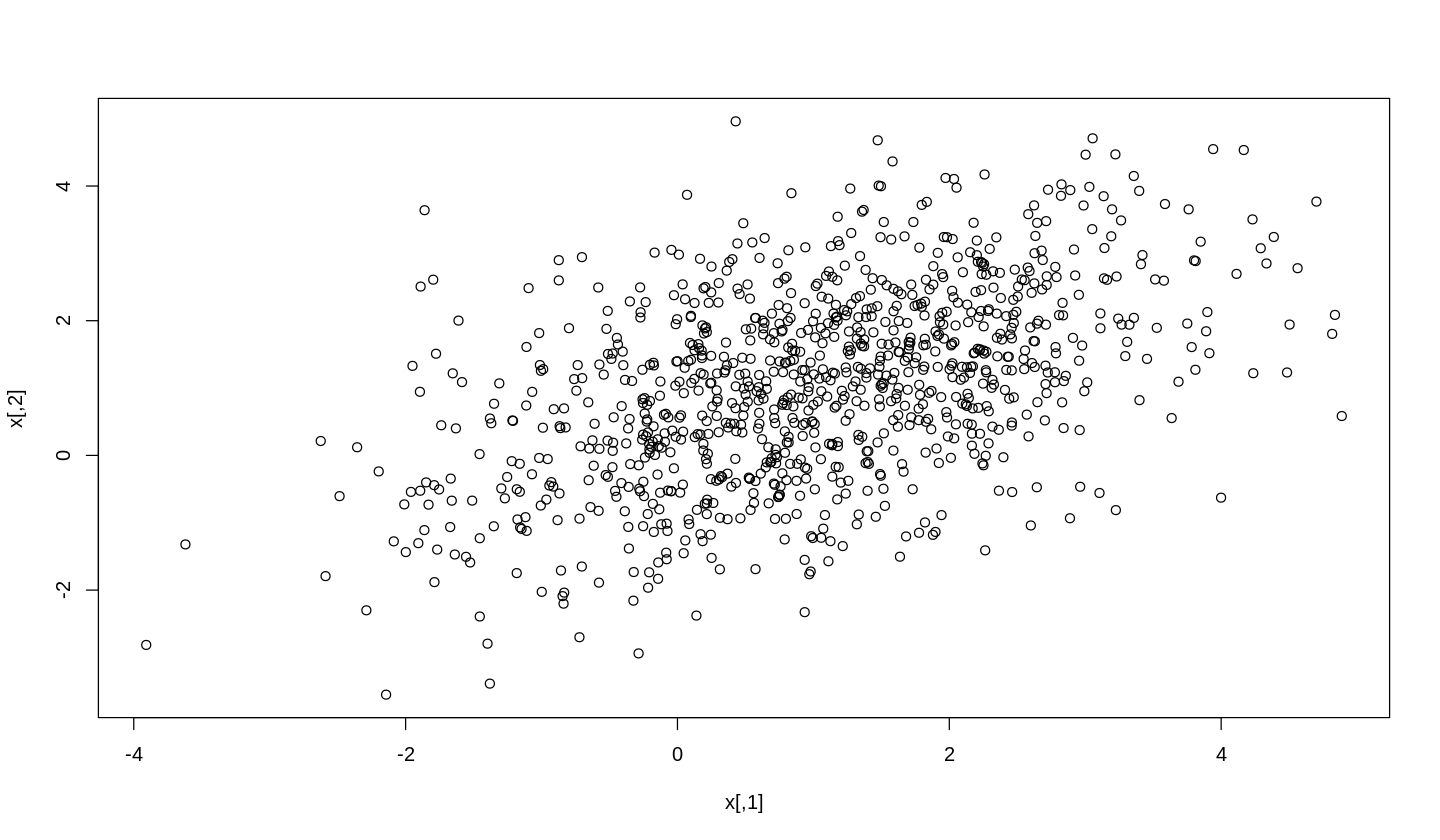

In [1]:
#Descomentar si no esta instalado el paquete
#install.packages("mvtnorm")

#llama a la biblioteca Normal Multivariada
library(mvtnorm)

#Sortea n realizaciones de una gaussiana multivariada de dimension 2. 
#mean es el vector columna de medias. sigma es la matriz cuadrada de covarianzas.
#Modificar las covarianzas para ver el rol de la matriz.
x <- rmvnorm(n=1000, mean=c(1,1), sigma=cbind(c(2,1),c(1,2)))

options(repr.plot.width=12, repr.plot.height=7) #ajusta tamaño de graficas

plot(x) #plotea los puntos


### Observaciones:

* La distribución de un proceso estocástico queda definida por *toda la familia* de distribuciones conjuntas de las variables que lo integran $\{x_t\}$.
* Dichas distribuciones deben ser consistentes entre sí (muy difícil de chequear).
* En general es muy difícil trabajar con la distribución conjunta salvo casos excepcionales (ej: Gaussiana)
* La *distribución marginal* de $x_t$ **solo nos dice** cṕmo se comporta el proceso en tiempo $t$, pero no su interrelación con los demás tiempos.

Definamos entonces algunas medidas descriptivas de un proceso estocástico. Básicamente la media y varianza, y la más importante, su *autocorrelación*.

### Media, varianza, covarianza de variables aleatorias.

> **Definición:** La media de una v.a. continua $X$ se define como:

$$\mu = E[X]  = \int xf(x)dx$$

> **Definición:** La varianza de una v.a. continua $X$ se define como:

 $$\sigma^2 = E[(X-\mu)^2]  = \int (x-\mu)^2 f(x)dx = E[X^2] - \mu^2$$

> **Definición:** La covarianza de dos v.a. continuas $X, Y$ de medias $\mu_X,\mu_Y$ se define como:

 $$\textrm{Cov}(X,Y) = E[(X-\mu_X)(Y-\mu_Y)]  = \iint (x-\mu_X)(y-\mu_Y) f(x,y)dxdy = E[XY] - \mu_X\mu_Y$$




### Función media de una serie temporal

> **Definición:** La *función media* (mean function) de un proceso estocástico o serie temporal $\{x_t\}$ se define como:

$$\mu_x(t) = \mu_{xt} = E[x_t] = \int x f_t(x)dx.$$

Notar que en principio depende del tiempo.

#### Ejemplo: Ruido blanco

Si $x_t = w_t$ ruido blanco Gaussiano, entonces $E[w_t] = 0$ por lo que $\mu_t = 0$ para todo $t$.

#### Ejemplo: Media móvil

Si $w_t$ es ruido blanco Gaussiano y definimos el proceso de media móvil:

$$x_t = \frac{1}{3}[w_{t-1} + w_t + w_{t+1}]$$

Entonces $E[x_t] = \frac{1}{3}[E[w_{t-1}] + E[w_t] + E[w_{t+1}] = 0$ por lo que también $\mu_t = 0$ para todo $t$.

#### Ejemplo: Paseo al azar con deriva

Si el proceso es:

$$x_t = \delta t + \sum_{j=1}^t w_j$$

con $\{w_j\}$ ruido blanco, entonces $\mu_t = E[x_t] = \delta t$.

#### Ejemplo: Señal más ruido.

Si el proceso es de la forma:

$$x_t = s_t + w_t$$

con $s_t$ una señal dada (ej: función coseno del ejemplo del cuaderno anterior), y $w_t$ ruido de media $0$, entonces $E[x_t] = s_t$.

### Autocovarianza de una serie temporal

La autocovarianza es una medida de la *estructura de dependencia interna* del proceso.

> **Definición:** La *función de autocovarianza* de una serie temporal es el momento de segundo orden:

$$\gamma_x(s,t) = \textrm{Cov}(x_s,x_t) = E[(x_s-\mu_s)(x_t-\mu_t)].$$
para cada $s$ y $t$.

Se trata de una medida de dependencia lineal entre los valores del proceso en tiempo $s$ y $t$.

**Propiedades:**

* Para $s=t$, $\gamma(s,s) = \textrm{Cov}(x_s,x_s) = \textrm{Var}(x_s)$.  

* $\gamma_x(s,t) = \gamma_x(t,s)$ por definición por lo que la función es simétrica.

* Si $\gamma(s,t) = 0$ quiere decir que no hay dependencia lineal (pero no que son independientes).

* Si $\gamma(s,t) = 0$ y $x_s,x_t$ son conjuntamente Gaussianos, entonces $x_s$ y $x_t$ son independientes.



#### Propiedad de la covarianza (combinaciones lineales):

Si $U = \sum_{j=1}^m a_j X_j$ y $V = \sum_{k=1}^n b_k Y_k$ son v.a. que resultan de combinar linealmente $\{X_j:j=1,\ldots,m\}$ y $\{Y_k:k=1\ldots,n\}$ entonces:

$$\textrm{Cov}(U,V) = \sum_{j=1}^m \sum_{k=1}^n a_jb_k \textrm{Cov}(X_j,Y_k).$$

Observar que lo anterior puede ponerse como $\textrm(Cov(U,V)) = a^T M b$ siendo $a$ y $b$ vectores columna y $M$ una matriz $m\times n$ cuyas entradas son las covarianzas.

En particular, si $X$ es un vector aleatorio con matriz de covarianzas $\Sigma$, y $U=a^T X$, $\textrm{Var}(U) = a^T \Sigma a$ (interpretando $a$ como vector columna).

#### Ejemplo: Ruido blanco

Si $x_t = w_t$ ruido blanco, por definición $w_s$ y $w_t$ son no correlacionados, es decir $\textrm{Cov}(w_s,w_t) = 0$. A su vez, a $\textrm{Cov}(w_s,w_s) = \textrm{Var}(w_s) = \sigma^2_w$ se le denomina *potencia* del ruido blanco.

Por lo tanto:

$$\gamma(s,t) = \left\{\begin{array}{ll} \sigma^2_w & s=t \\ 0 & s\neq t \end{array}\right.$$

#### Ejemplo: Media móvil

Considere nuevamente proceso de media móvil:

$$x_t = \frac{1}{3}[w_{t-1} + w_t + w_{t+1}]$$

Aplicando la propiedad de combinaciones lineales citada antes se obtiene:

$$\gamma(s,t) = \left\{\begin{array}{ll} 1/9 \sigma_w^2 & s=t-2 \\
2/9 \sigma_w^2 & s=t-1 \\
3/9 \sigma_w^2 & s=t \\
2/9 \sigma_w^2 & s=t+1 \\
1/9 \sigma_w^2 & s=t+2 \\
0 & \text{en otro caso} \end{array}\right..$$


Notar que en los dos casos anteriores, $\gamma(s,t)$ solo depende de $t-s$.


#### Ejemplo: Paseo al azar

Consideremos un paseo al azar sin deriva $x_t = \sum_{j=1}^t w_j$ con $\{w_j\}$ ruido blanco. La autocovarianza queda:

$$\gamma_x(s,t) = \textrm{Cov}(x_s,x_t) = \textrm{Cov}\left(\sum_{j=1}^s w_j, \sum_{k=1}^t w_k\right) = \min\{s,t\} \sigma_w^2.$$

Prueba: usar la propiedad anterior y contar la cantidad de términos que sobreviven usando que $\textrm{Cov}(w_s,w_t)=0$ si $s\neq t$.

Observar que en este caso $\gamma_x$ depende explícitamente de $s$ y $t$ (no solo la diferencia) y que $\textrm{Var}(x_t) = t\sigma_w^2$ es creciente con $t$ (porque acumulamos más términos).

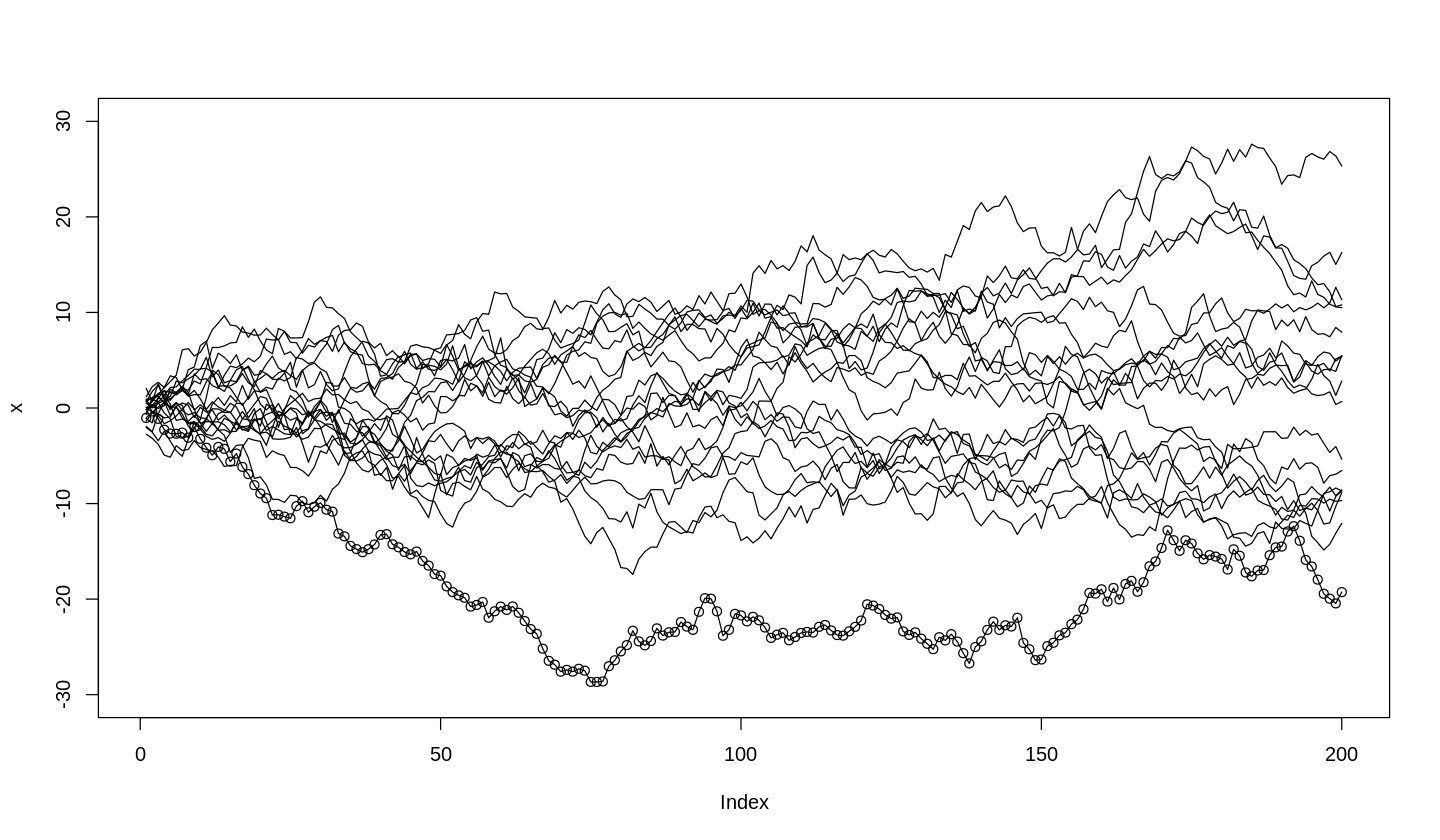

In [2]:
#Ejemplo. 20 simulaciones de paseo al azar sin deriva.

#Sorteo 200 muestras de N(0,1).
w = rnorm(200);

#La suma acumulada (cumsum) produce el paseo al azar
x = cumsum(w);

#Ploteo una trayectoria ajustando los ejes
plot(x,ylim=c(-30,30))
lines(x)

#Sorteo 19 realizaciones más en la misma gráfica.
for (i in 1:19){
    w = rnorm(200); 
    x = cumsum(w);   
    lines(x)
}


### Autocorrelación de una serie temporal

La desigualdad de Cauchy-Schwarz dice que, para dos variables aleatorias $X$, $Y$ se cumple que:

$$ \textrm{Cov}(X,Y)^2 \leqslant \textrm{Var}(X) \textrm{Var}(Y).$$

Por lo que el cociente denominado *coeficiente de correlación*:

$$\rho(X,Y) = \frac{\textrm{Cov}(X,Y)}{\sqrt{\textrm{Var}(X) \textrm{Var}(Y)}} \in [-1,1].$$

> **Definición:** La función de autocorrelación (ACF) de un proceso o serie de tiempo se define como:

$$ \rho(s,t) = \frac{\gamma(s,t)}{\sqrt{\gamma(s,s)\gamma(t,t)}}.$$

Mide la relación lineal de la serie en tiempo $t$ a partir de su valor en $s$. Se cumple que $-1\leq \rho(s,t) \leq 1$ para todo $s,t$. Si $x_t = ax_s+b$, entonces $\rho$ es $1$ o $-1$ dependiendo del signo de $a$.

### Correlación cruzada de series.

La idea aquí es definir la misma idea de correlación de una serie pero para relacionar una serie $\{x_t\}$ con otra $\{y_t\}$.

> **Definición:** La *covarianza cruzada* (o cross-covariance) de dos series se define como:
>
$$ \gamma_{xy}(s,t) = E[(x_s - \mu_{xs})(y_t - \mu_{yt})].$$

> **Definición:** La *correlación cruzada* (o cross-correlation) de dos series se define como:
>
$$ \rho_{xy}(s,t) = \frac{\gamma_{xy}(s,t)}{\sqrt{\gamma_x(s,s)\gamma_y(t,t)}}.$$



## Procesos estacionarios

Las definiciones anteriores son para cualquier proceso. Nos interesa en particular aquellos procesos que no cambian sus características en la ventana de tiempo que se miran. Dichos procesos se dicen *estacionarios*.

> **Definición:** Un proceso se dice *estacionario* (en sentido estricto) si la función de distribución conjunta de $\{x_{t_1},\ldots,x_{t_k}\}$ es idéntica a la de
> $\{x_{t_1+h},\ldots,x_{t_k+h}\}$, para cualquier selección de los tiempos $t_i$, cualquier $k$ entero y cualquier $h$ real.

**Observación**: muy difícil de chequear. En particular, la media $\mu$ debe ser constante. Otra propiedad importante es la siguiente: si $\{x_s,x_t\}$ tiene la misma distribución que $\{x_{s+l},x_{t+l}\}$ entonces la autocovarianza debe cumplir:

$$\gamma(s,t) = \gamma(s+l,t+l)$$
para todo $l$. En particular, tomando $l=-s$:

$$\gamma(s,t) = \gamma(0,t-s) = \gamma(t-s).$$

Es decir la autocovarianza solo depende del *lag* $h=t-s$, la distancia entre las muestras.

### Procesos estacionarios en sentido débil

Un proceso estocástico o serie temporal $\{x_t\}$ se dice estacionaria (en sentido débil, pero diremos estacionaria de aquí en más) si se cumple que:

* La media $\mu_t = E[x_t] = \mu$ es constante para todo $t$.
* La autocovarianza $\gamma(s,t)$ solo depende de $s$ y $t$ a través de su diferencia $|t-s|$. En general la denotaremos como $\gamma(h)$ siendo $h$ el lag. Observar que $\gamma(-h) = \gamma(h)$ y $\gamma(0)=\textrm{Var}(x_t)$.

**Observación:** Estacionario estricto $\Rightarrow$ estacionario.



### Función de autocorrelación de un proceso estacionario.

Se define como:

$$\rho(h) = \frac{\gamma(t+h,t)}{\sqrt{\gamma(t+h,t+h)\gamma(t,t)}} = \frac{\gamma(h)}{\gamma(0)}.$$

Notar que la función es simétrica y $\rho(0)=1$.


### Estacionariedad conjunta

Dos series temporales son *conjuntamente estacionarias* si cada una es estacionaria y la función de covarianza cruzada (cross-covariance) solo depende del lag $h$:

$$\gamma_{xy}(t,s) = \gamma_{xy}(0,t-s) = \gamma_{xy}(h).$$

La función de correlación cruzada se define entonces de manera análoga:

$$\rho_{xy}(h) = \frac{\gamma_{xy}(h)}{\sqrt{\gamma_x(0)\gamma_y(0)}}.$$

### Ejemplos:

* El ruido blanco del ejemplo anterior.

* La media móvil del ejemplo anterior.

* Un proceso autorregresivo *en estado estacionario*, es decir, una vez que se olvidó de la condición inicial

* NO SON EJEMPLOS: el paseo al azar (con o sin deriva). Señal escondida en el ruido. 

## Estimación de la correlación a partir de muestras

**Problema:** La función de autocorrelación está bien definida, pero si no tenemos el modelo debemos estimarla a partir de observaciones.

**Desafío:** en el caso de variables $iid$ promediando podíamos hallar media y varianza. El problema aquí es que en general disponemos de una única realización de la serie de tiempo!

**Idea:** En el caso de series estacionarias, podemos utilizar las propias muestras, ya que las características de la serie no cambian con el tiempo.

### Estimador de la media:

Sea $x_t$ un proceso estacionario. Se tiene el siguiente estimador para la media $\mu$:

$$\bar{x} = \frac{1}{n} \sum_{t=1}^n x_t$$

La varianza de este estimador se puede calcular a partir de la correlación del proceso:

$$\textrm{Var}(\bar{x}) = \frac{1}{n} \sum_{h=-n}^n \left(1-\frac{|h|}{n}\right)\gamma(h).$$

### Estimador de la autocorrelación:

La *autocovarianza muestral* de una realización $\{x_t\}$ de una serie de tiempo estacionaria se define como:

$$ \hat{\gamma}(h) = \frac{1}{n} \sum_{t=1}^{n-h}(x_{t+h}-\bar{x})(x_t-\bar{x}).$$

con $\hat{\gamma}(-h) = \hat{\gamma}(h)$ y $h=0,1\ldots,n-1$.

La *autocorrelación muestral* se define como:

$$\hat{\rho}(h) = \frac{\hat{\gamma}(h)}{\hat{\gamma}(0)}.$$


### Propiedad (distribución asintótica de la ACF)

Si el proceso es ruido blanco (con momentos finitos, en particular ruido blanco gaussiano), entonces para una muestra grande ($n\to\infty$), la estimación anterior de la ACF es asintóticamente gaussiana con desvío:

$$\sigma_{\rho(h)} = \frac{1}{\sqrt{n}}$$.

Otra forma de verlo: si es ruido blanco, 95% de las autocorrelaciones ($h>0$) estimadas caen a $\pm \frac{2}{\sqrt{n}}$ de $0$. Entonces si una medida de autocorrelación cae fuera de este intervalo es porque no proviene de ruido blanco.

O de otro modo, si uno "blanquea" la señal (se queda solo con la parte de ruido), tenemos un test para chequear que lo que obtuvimos sea ruido blanco.

## Ejercicios

1. Simular una señal de ruido blanco y estimar su autocorrelación. Probar con $n=50$ y $n=200$ datos y discutir las diferencias.
2. Simular el proceso de media móvil visto anteriormente y estimar su autocorrelación. Probar nuevamente con $n=50$ y $n=200$ datos y discutir las diferencias.
3. Simular el proceso autorregresivo visto anteriormente y repetir la pregunta anterior. Discutir las diferencias entre los 3 procesos.

Sugerencia: usar los comandos `filter` y `acf` de R.